In [33]:
import numpy as np
import pandas as pd

In [34]:
temp = pd.read_csv("G:/Downloads/Random Forest/temps.csv")

In [35]:
temp.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [36]:
print("The shape of temp is ", temp.shape)

The shape of temp is  (348, 12)


In [37]:
pd.isnull(temp).sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [38]:
temp = pd.get_dummies(temp)
temp.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [39]:
temp_list = temp.drop('actual', axis = 1)
temp_list.head()

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,46,46,46,41,0,0,0,0,0,1,0


In [40]:
labels = np.array(temp['actual'])

In [41]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [42]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,temp_list, labels)
score

array([ 0.44439984,  0.26726323,  0.79417425])

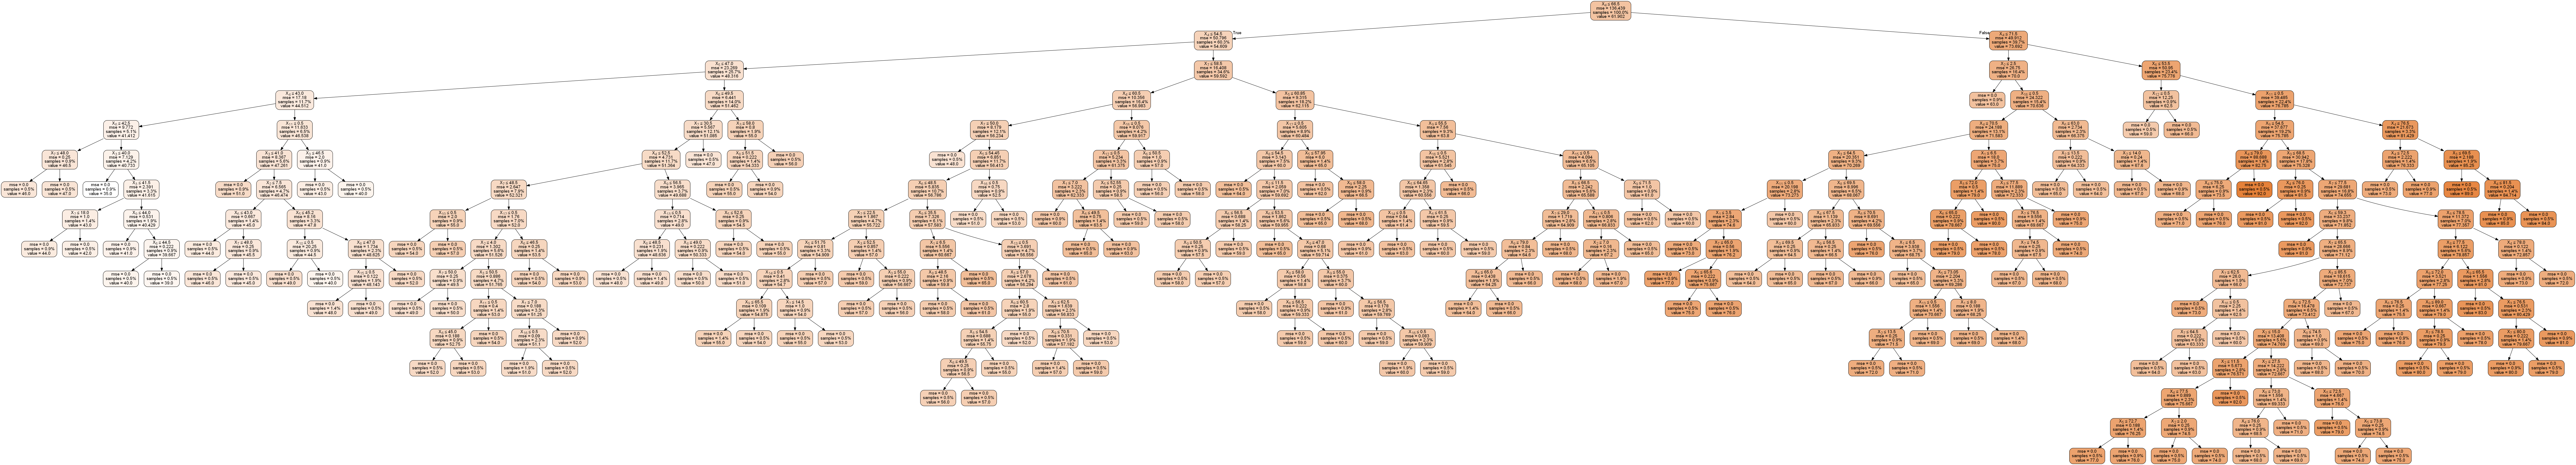

In [43]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 
import pydotplus
# Pull out one tree from the forest
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

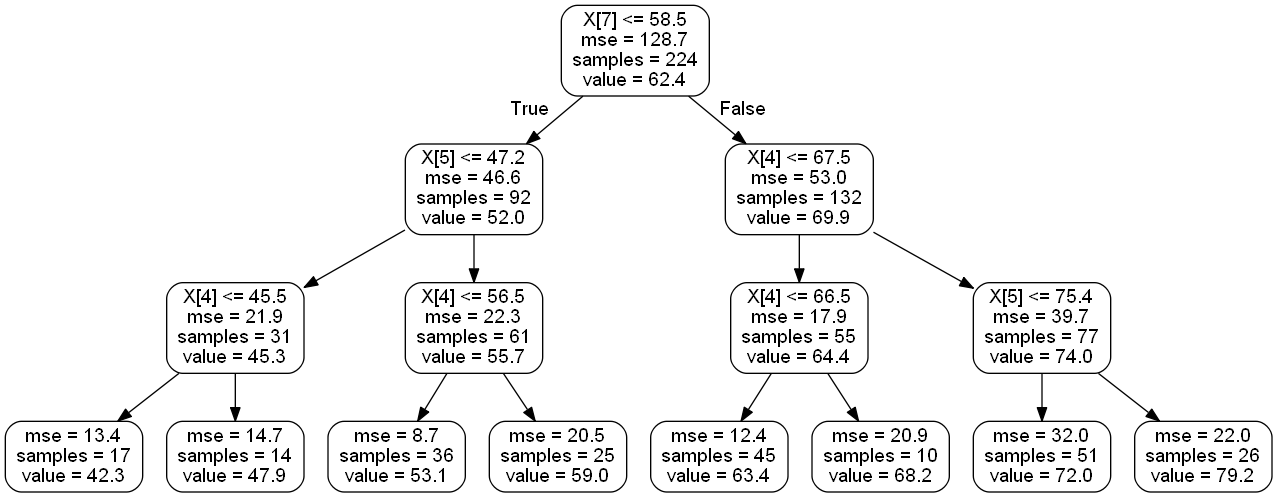

In [44]:
# Limit depth of tree to 3 levels
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(temp_list, labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
Image(graph.create_png())